In [3]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit

In [17]:
global_temp_data = pd.read_csv("C:/Users/nhuwa/python_decal/HW9/GlobalLandTemperaturesByStateV2.csv")

In [19]:
print(global_temp_data)


                dt  AverageTemperature  AverageTemperatureUncertainty  \
0       1855-05-01              25.544                          1.171   
1       1855-06-01              24.228                          1.103   
2       1855-07-01              24.371                          1.044   
3       1855-08-01              25.427                          1.073   
4       1855-09-01              25.675                          1.014   
...            ...                 ...                            ...   
645670  2013-05-01              21.634                          0.578   
645671  2013-06-01              24.679                          0.596   
645672  2013-07-01              29.272                          1.340   
645673  2013-08-01              29.202                          0.869   
645674  2013-09-01                 NaN                            NaN   

           State Country  
0           Acre  Brazil  
1           Acre  Brazil  
2           Acre  Brazil  
3           Acr

In [31]:
readable_data = global_temp_data.iloc[:, [0, 1, 2, 3, 4]]

In [33]:
readable_data

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil
...,...,...,...,...,...
645670,2013-05-01,21.634,0.578,Zhejiang,China
645671,2013-06-01,24.679,0.596,Zhejiang,China
645672,2013-07-01,29.272,1.340,Zhejiang,China
645673,2013-08-01,29.202,0.869,Zhejiang,China


In [43]:
filtered_data = global_temp_data.iloc[:, [0, 1, 3]]

In [49]:
filtered_data


,dt,AverageTemperature,State
0,1855-05-01,25.544,Acre
1,1855-06-01,24.228,Acre
2,1855-07-01,24.371,Acre
3,1855-08-01,25.427,Acre
4,1855-09-01,25.675,Acre
...,...,...,...
645670,2013-05-01,21.634,Zhejiang
645671,2013-06-01,24.679,Zhejiang
645672,2013-07-01,29.272,Zhejiang
645673,2013-08-01,29.202,Zhejiang


In [55]:
#note: can convert date to datetime object
filtered_data.loc[:, 'dt'] = pd.to_datetime(filtered_data['dt'])

In [57]:
later_data = filtered_data[filtered_data['dt'].dt.year >= 2000] #create a mask to filter dates for later than year 2000!

In [59]:
later_data

,dt,AverageTemperature,State
1736,2000-01-01,25.934,Acre
1737,2000-02-01,26.102,Acre
1738,2000-03-01,26.107,Acre
1739,2000-04-01,25.952,Acre
1740,2000-05-01,25.832,Acre
...,...,...,...
645670,2013-05-01,21.634,Zhejiang
645671,2013-06-01,24.679,Zhejiang
645672,2013-07-01,29.272,Zhejiang
645673,2013-08-01,29.202,Zhejiang


In [68]:
#create a filter (list) of states to be included in final dataset

state_filter = ['Nebraska', 'South Dakota', 'Wyoming']

state_data = later_data[later_data['State'].isin(state_filter)]

In [70]:
state_data

,dt,AverageTemperature,State
350761,2000-01-01,-2.024,Nebraska
350762,2000-02-01,1.719,Nebraska
350763,2000-03-01,5.687,Nebraska
350764,2000-04-01,9.417,Nebraska
350765,2000-05-01,16.827,Nebraska
...,...,...,...
626435,2013-05-01,10.607,Wyoming
626436,2013-06-01,16.267,Wyoming
626437,2013-07-01,20.222,Wyoming
626438,2013-08-01,19.621,Wyoming


In [72]:
#notes: the reset_index() part took some researching! apparently grouping columns changes their index
#so resetting the index restores the table format properly!
temp_avg_data = state_data.groupby('dt')['AverageTemperature'].mean().reset_index()
temp_avg_data

,dt,AverageTemperature
0,2000-01-01,-4.072000
1,2000-02-01,-0.205000
2,2000-03-01,3.642667
3,2000-04-01,7.609667
4,2000-05-01,14.255000
...,...,...
160,2013-05-01,13.196000
161,2013-06-01,18.783667
162,2013-07-01,22.110333
163,2013-08-01,21.890000


In [74]:
import matplotlib.pyplot as plt

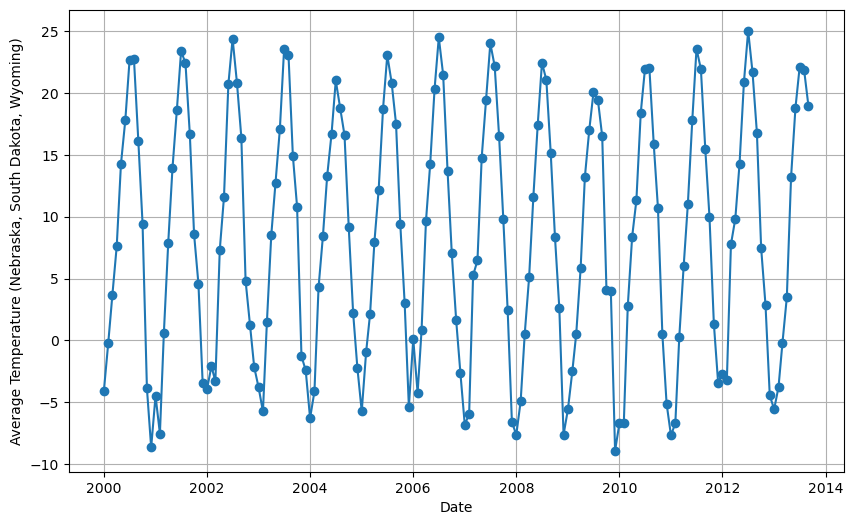

In [78]:
plt.figure(figsize=(10, 6))

plt.plot(temp_avg_data['dt'], temp_avg_data['AverageTemperature'], marker='o')

plt.xlabel('Date')
plt.ylabel('Average Temperature (Nebraska, South Dakota, Wyoming)')
plt.grid(True)
plt.show()

In [80]:
#notes: since I converted my dates to date-time objects, I get to convert back now lol
#to keep the units in years, I'll set the earliest date in the dataset as a reference date, and count the years since this date
#since pandas only counts differences in seconds, we'll have to convert back from seconds to years again

ref_date = pd.Timestamp('2000-01-01')

#now this column is the "years since initial date" value, which is inserted as our x-axis data

temp_avg_data['years_since_2k'] = (temp_avg_data['dt'] - ref_date).dt.total_seconds() / (365.25 * 24 * 3600)

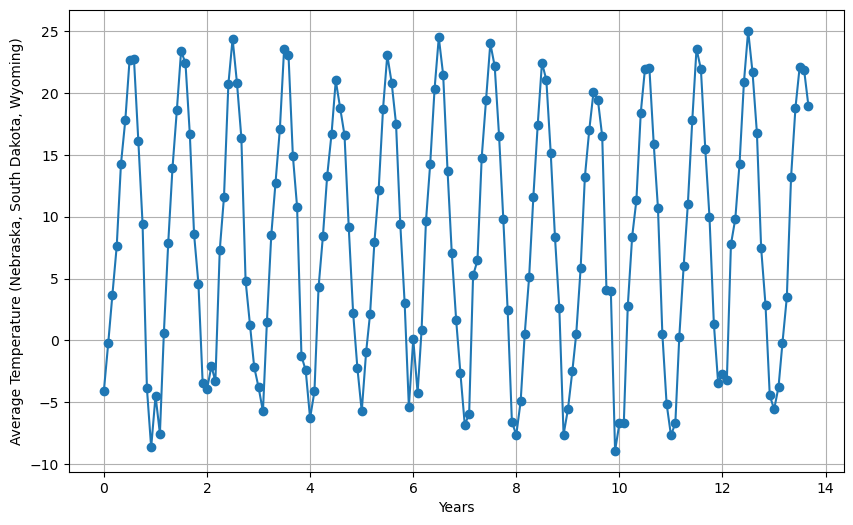

In [84]:
plt.figure(figsize=(10, 6))

plt.plot(temp_avg_data['years_since_2k'], temp_avg_data['AverageTemperature'], marker='o')

plt.xlabel('Years')
plt.ylabel('Average Temperature (Nebraska, South Dakota, Wyoming)')
plt.grid(True)
plt.show()

In [236]:
#notes: setting up equation: seems to be a cosine, with period of roughly 1 year. use T=A*cos(2*pi*f*x +phi)
#A=amplitude
#B = vertical offset (avg temp)
#f = frequency in units of cycles per year
#phi = phase shift representing horizontal offset

#create x and y data for the fit
x_data = temp_avg_data['years_since_2k']
y_data = temp_avg_data['AverageTemperature']

#create function for curve_fit to use:
def seasonal_temp(x, A, f, phi, B):
    return A * np.cos(2* np.pi * f * x + phi) + B

#note: running the code like this leaves the covariance undetermined I believe due to f and phi being in the argument
#will try placing bounds on parameters to fix this

bounds = (
    [0, 0.5, 0, 5], [20, 2, 2*np.pi, 15]
)
#need an initial guess for the parameters above

param_guess = [14, 1, 1.9, 10]

temp_par, temp_cov = curve_fit(seasonal_temp, x_data, y_data, p0= param_guess, bounds=bounds)

A_fit, f_fit, phi_fit, B_fit = temp_par



In [238]:
B_fit

8.17035677635479

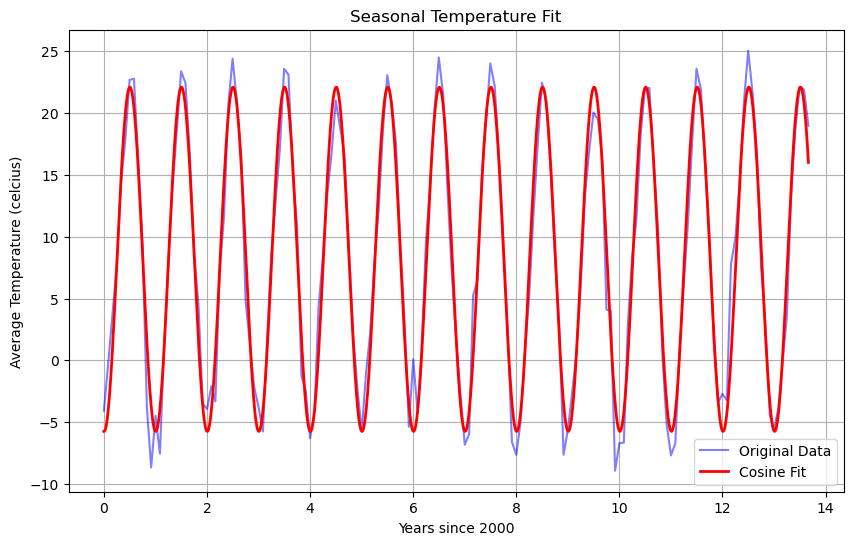

In [240]:
x_temp_fit = np.linspace(x_data.min(), x_data.max(), 1000)
y_temp_fit = seasonal_temp(x_temp_fit, A_fit, f_fit, phi_fit, B_fit)

plt.figure(figsize=(10,6))
plt.plot(x_data, y_data, 'blue', label='Original Data', alpha=0.5)
plt.plot(x_temp_fit, y_temp_fit, 'r-', label='Cosine Fit', linewidth=2)

plt.xlabel('Years since 2000')
plt.ylabel('Average Temperature (celcius)')
plt.title('Seasonal Temperature Fit')
plt.legend()
plt.grid(True)
plt.show()

In [242]:
print(f"Mean temp in data: {y_data.mean():.2f}")

Mean temp in data: 8.23


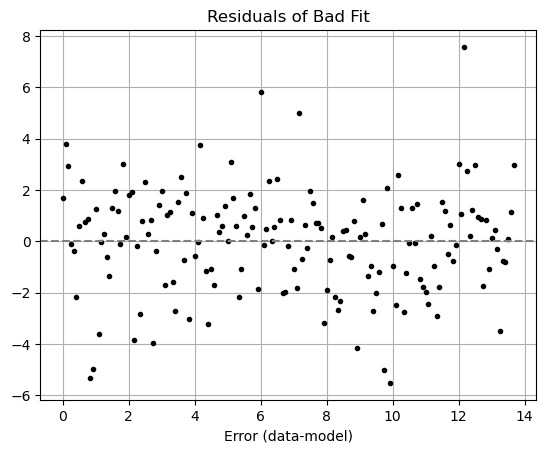

In [244]:
#plot residuals to find out why this fit sucks
#the fit has been fixed, I guess that's why we plot residuals

residuals = y_data - seasonal_temp(x_data, *temp_par)
plt.plot(x_data, residuals, 'k.')
plt.axhline(0, color='gray', linestyle='--')
plt.title('Residuals of Bad Fit')
plt.xlabel("Error (data-model)")
plt.grid(True)
plt.show()

In [250]:
A, f, phi, B = temp_par
param_err = np.sqrt(np.diag(temp_cov))

for name, value, error in zip(["A", "f", "phi", "B"], temp_par, param_err):
    print(f"{name} = {value:.3f} +/- {error:.3f}") #for loops are awesome
print(f"Fitted Model: T(t) = {A_fit:.3f}*cos(2*np.pi*{f_fit:.3}x + {phi_fit:.3f}) + {B_fit:.3f}")

A = 13.915 +/- 0.226
f = 0.999 +/- 0.001
phi = 3.115 +/- 0.033
B = 8.170 +/- 0.160
Fitted Model: T(t) = 13.915*cos(2*np.pi*0.999x + 3.115) + 8.170


In [256]:
from astropy.table import Table

astro_table = Table.read('C:/Users/nhuwa/python_decal/HW9/global_SF6_MM.dat', format='ascii')

global_data = astro_table.to_pandas()

In [258]:
global_data

,SF6ottoyr,SF6ottomon,SF6ottoNHm,SF6ottoNHsd,SF6ottoSHm,SF6ottoSHsd,SF6ottoGLm,SF6ottoGLsd
0,1995,1,3.533,0.029,3.207,0.125,3.370,0.064
1,1995,2,3.512,0.154,3.282,0.193,3.397,0.122
2,1995,3,3.558,0.159,3.244,0.120,3.401,0.100
3,1995,4,3.618,0.090,3.287,0.170,3.453,0.094
4,1995,5,3.626,0.133,3.308,0.139,3.467,0.099
...,...,...,...,...,...,...,...,...
223,2013,8,NaN,NaN,NaN,NaN,NaN,NaN
224,2013,9,NaN,NaN,NaN,NaN,NaN,NaN
225,2013,10,NaN,NaN,NaN,NaN,NaN,NaN
226,2013,11,NaN,NaN,NaN,NaN,NaN,NaN


In [296]:
ugd = global_data.iloc[:, [0, 1, 6, 7]].copy() #kept getting a copy warning due to replicating data into "ugd" usable global data

In [300]:
ugd['date'] = pd.to_datetime({
    'year': ugd['SF6ottoyr'],
    'month': ugd['SF6ottomon'],
    'day':1
})

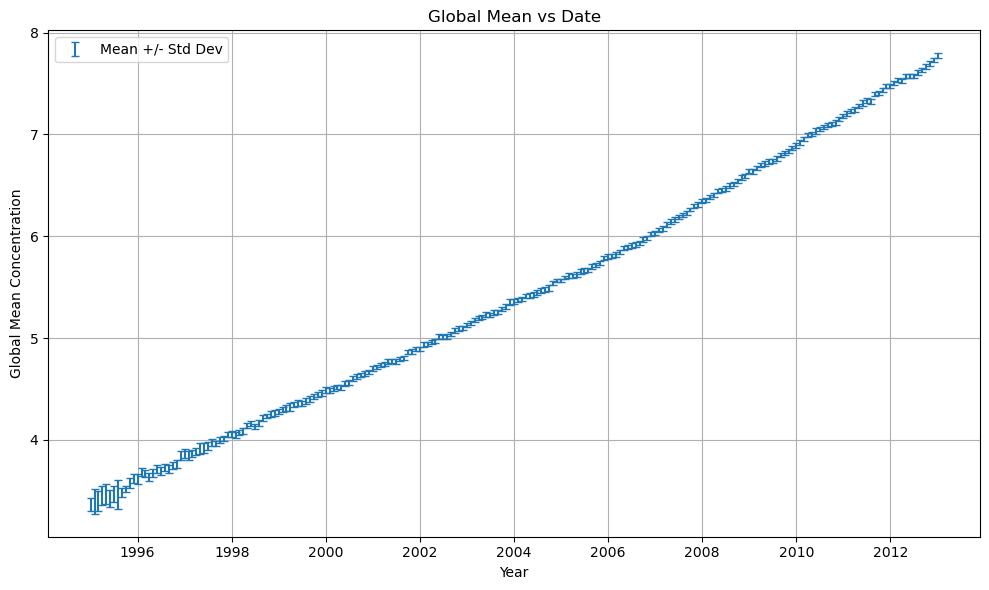

In [304]:
plt.figure(figsize=(10, 6))
plt.errorbar(ugd['date'], ugd['SF6ottoGLm'], yerr=ugd['SF6ottoGLsd'], fmt='none', capsize=3, label='Mean +/- Std Dev')

plt.xlabel('Year')
plt.ylabel('Global Mean Concentration')
plt.title('Global Mean vs Date')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [314]:
# start_date = ugd['date'].min()

# ugd['dated'] = (ugd['date'] -start_date).dt.days / 365.25

fit_data = ugd[['date', 'SF6ottoGLm']].dropna() #need to drop NaN values to avoid errors with curve_fit

start_date = fit_data['date'].min()

x_new = (fit_data['date'] - start_date).dt.days / 365.25
y_new = fit_data['SF6ottoGLm']

In [316]:
def lin_fit(x, m, b):
    return m * x + b



new_par, new_cov = curve_fit(lin_fit, x_new, y_new)

m_fit, b_fit = new_par

In [320]:
b_fit

3.2848225682304504

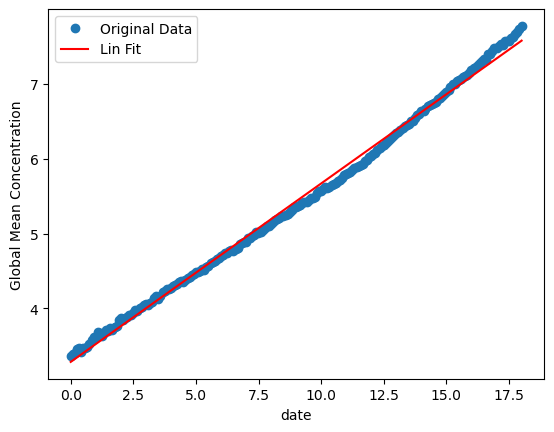

In [322]:
new_fit = lin_fit(x_new, m_fit, b_fit)

plt.plot(x_new, y_new, 'o', label='Original Data')
plt.plot(x_new, new_fit, 'r-', label='Lin Fit')
plt.xlabel('date')
plt.ylabel('Global Mean Concentration')
plt.legend()
plt.show()

In [336]:
sigma = ugd['SF6ottoGLsd']
new_res = y_new - new_fit

chi_sq = np.sum((new_res / sigma)**2)
deg_fr=len(x_new) - len(new_par)

reduced_chi = chi_sq / deg_fr

In [340]:
reduced_chi #This part isn't working quite right just yet

12.718578620869456